<center> <h1>Problem Statement</h1> </center>

<p>Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.
</p>

<a href="https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data">Dataset Kaggle Link</a>


# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
houses_data = pd.read_csv("/content/Housing.csv")


## Data Cleaning and Preparation

In [ ]:

print(houses_data.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [ ]:
houses_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
houses_data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
houses_data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
# Extract columns with null values
columns_with_null = houses_data.columns[houses_data.isnull().any()]

# Display columns with null values
print("Columns with null values:")
for col in columns_with_null:
    print(col)

Columns with null values:


In [ ]:
# Check for missing values in each column
missing_values = houses_data.isnull().sum()

# Print columns with missing values and their corresponding counts
columns_with_missing_values = missing_values[missing_values > 0]
print("\nColumns with Missing Values:")
print(columns_with_missing_values)


Columns with Missing Values:
Series([], dtype: int64)


In [ ]:
# Check for duplicate rows
duplicates_before = houses_data.duplicated().sum()

# Remove duplicate rows
houses_data.drop_duplicates(inplace=True)

# Check for duplicate rows after removal
duplicates_after = houses_data.duplicated().sum()

# Print the results
if duplicates_before > 0:
    print(f"Handling Duplicates\n{duplicates_before} duplicate row(s) were found and removed.")
else:
    print("Handling Duplicates\nNo duplicate rows found in the dataset.")


Handling Duplicates
No duplicate rows found in the dataset.


In [ ]:
# Get the column names and data types
column_info = houses_data.dtypes

# Display column names and data types horizontally
for col_name, data_type in column_info.items():  # Use items() instead of iteritems()
    print(f"{col_name}: {data_type}\t", end='')


price: int64	area: int64	bedrooms: int64	bathrooms: int64	stories: int64	mainroad: object	guestroom: object	basement: object	hotwaterheating: object	airconditioning: object	parking: int64	prefarea: object	furnishingstatus: object	

In [ ]:
houses_data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
fig = px.scatter_3d(houses_data,x = 'area', y='bedrooms',z = 'bathrooms')
fig.show()

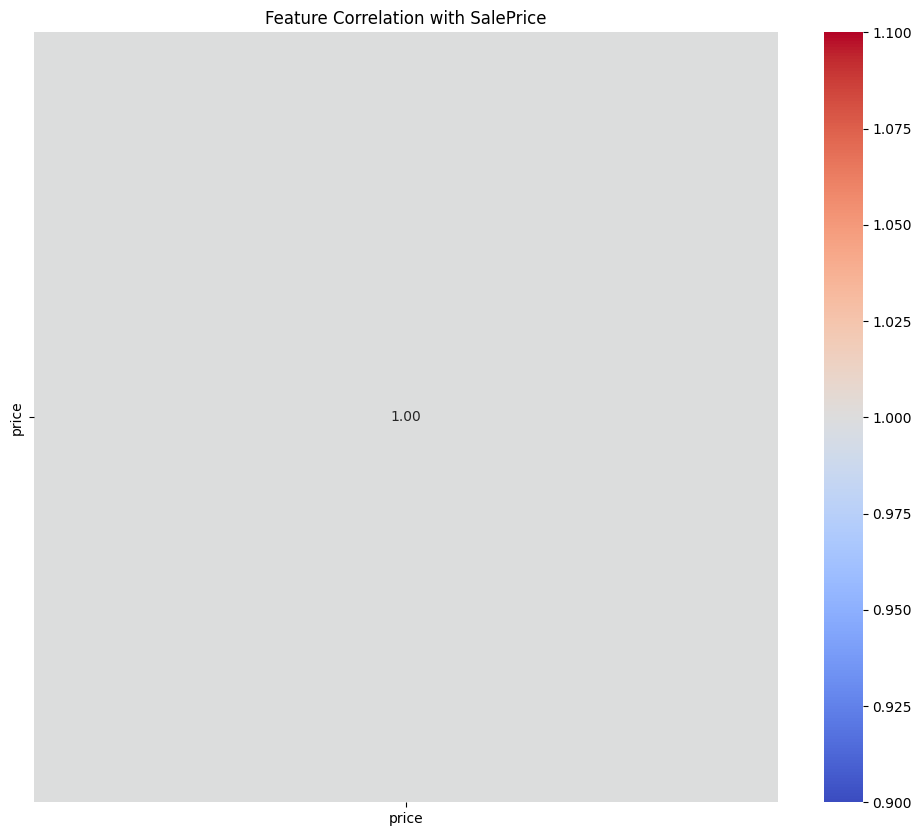

In [ ]:
#  list of categorical columns to exclude
categorical_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']

# Select numerical columns
numerical_columns = [col for col in houses_data.columns if col not in categorical_columns]

# Create a DataFrame with only numerical features and the target variable
numerical_data = houses_data[numerical_columns + ['price']]

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Step 2: Generate a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[['price']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation with SalePrice")
plt.show()

In [ ]:
# Split the data into training and testing sets
X = houses_data[['area', 'bedrooms', 'bathrooms']]
y = houses_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


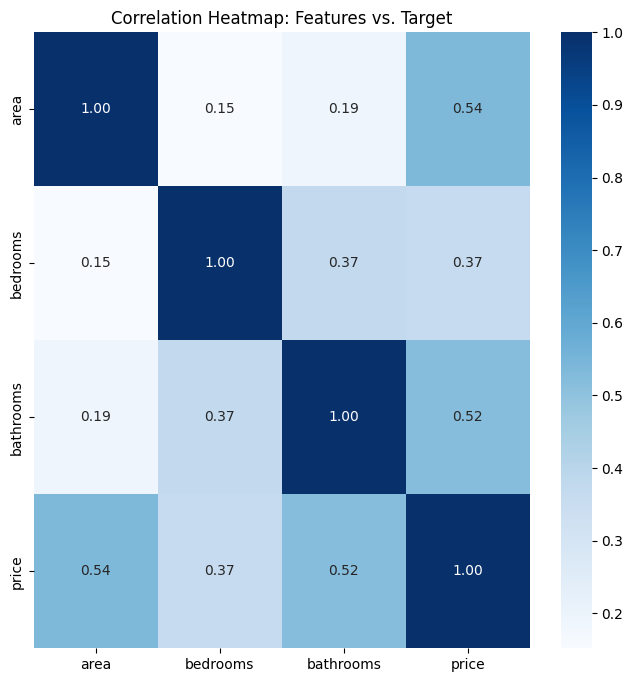

In [ ]:
# Select the columns of interest (features and target)
features = houses_data[['area', 'bedrooms', 'bathrooms']]
target = houses_data[['price']]

# Create a new DataFrame with only the selected columns
data_subset = pd.concat([features, target], axis=1)  # Use square brackets and specify axis=1

# Calculate the correlation matrix
correlation_matrix = data_subset.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Heatmap: Features vs. Target")
plt.show()


In [ ]:
# Check for missing values in the training dataset
missing_train = houses_data.isnull().sum()
print("Missing Values in Training Data:")
print(missing_train)

# Check for missing values in the testing dataset
missing_test = test_data.isnull().sum()
print("\nMissing Values in Testing Data:")
print(missing_test)

Missing Values in Training Data:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Missing Values in Testing Data:
Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


In [ ]:
# Missing values in selected features
features_missing_values = X.isnull().sum()
features_missing_values

area         0
bedrooms     0
bathrooms    0
dtype: int64

In [ ]:
#create a linear regression model
model = LinearRegression()

In [ ]:
# Fit the model to the training data
model.fit(X_train, y_train)
print(model)

LinearRegression()


In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 2750040479309.05
R-squared: 0.46


In [ ]:
X.sample(5)

,area,bedrooms,bathrooms
62,6240,4,2
516,3240,2,1
138,5000,3,1
449,1650,3,1
21,7155,3,2


In [ ]:
# Predict the price of a new house
new_house = np.array([[2500, 4, 2]])
predicted_price = model.predict(new_house)
print(f"Predicted Price for the New House: ${predicted_price[0]:.2f}")

Predicted Price for the New House: $5208581.72


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [ ]:
# Cross-validation to assess model performance
cv_scores = cross_val_score(model, X, y, cv=5)
print('Cross-Validation Scores:', cv_scores)
print('Mean CV Score:', cv_scores.mean())

Cross-Validation Scores: [ -3.23415827  -7.66529992 -16.80680846 -27.88609775 -14.3534265 ]
Mean CV Score: -13.98915818011171


In [ ]:
print('Code by R.Harinarayanan')